#### IMPORTING LIBRARYS


In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import nltk
import matplotlib.pyplot as plt  
from wordcloud import STOPWORDS,WordCloud  
from matplotlib import rcParams
from nltk.tokenize import sent_tokenize, word_tokenize 

#### LOADING AND PREPARING DATA

In [48]:
import codecs


df_train=pd.read_csv("./data/train.csv") 
df_essays=pd.DataFrame(df_train["full_text"])
df_test=pd.read_csv("./data/test.csv")   
X=df_essays 
y=df_train.drop(["text_id","full_text"],axis=1)  
#=np.array2string(X) 
#essays=essays.partition("[")[2].partition("]")[0]
#essaydf_essays.to_string()  
#essays=df_essays.tobytes() 
#essays.fromhex(essays) 
essays=df_essays["full_text"]
essays=list(essays) 
essays="".join(essays)  
essays=('''"""''') +essays + ('''"""''')  
df_train_encoded=pd.get_dummies(df_train,columns=df_train.columns[2:]) 

,text_id,full_text,cohesion_1.0,cohesion_1.5,cohesion_2.0,cohesion_2.5,cohesion_3.0,cohesion_3.5,cohesion_4.0,cohesion_4.5,...,grammar_5.0,conventions_1.0,conventions_1.5,conventions_2.0,conventions_2.5,conventions_3.0,conventions_3.5,conventions_4.0,conventions_4.5,conventions_5.0
0,0016926B079C,I think that students would benefit from learn...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0022683E9EA5,When a problem is a change you have to let it ...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,003885A45F42,The best time in life is when you become yours...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### VISUALIZING DATA 

(-0.5, 799.5, 799.5, -0.5)

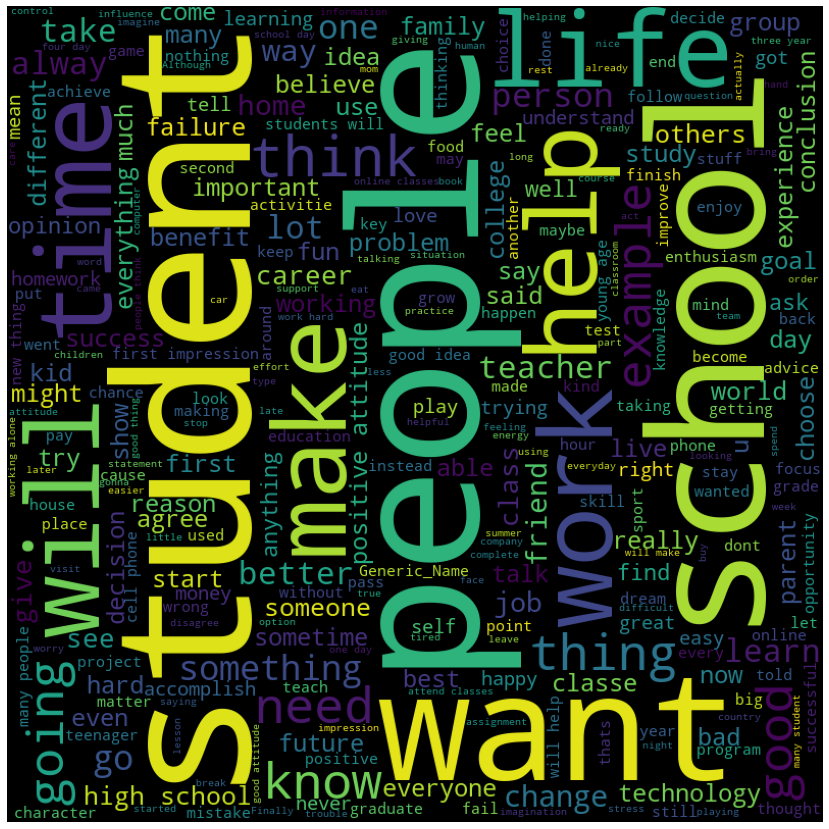

In [14]:
wordcloud= WordCloud(width=800,height=800,stopwords=STOPWORDS,background_color='black',max_words=300).generate(essays) 
plt.figure(figsize=(20,15))  
plt.clf()
plt.imshow(wordcloud)
plt.axis("off")

0

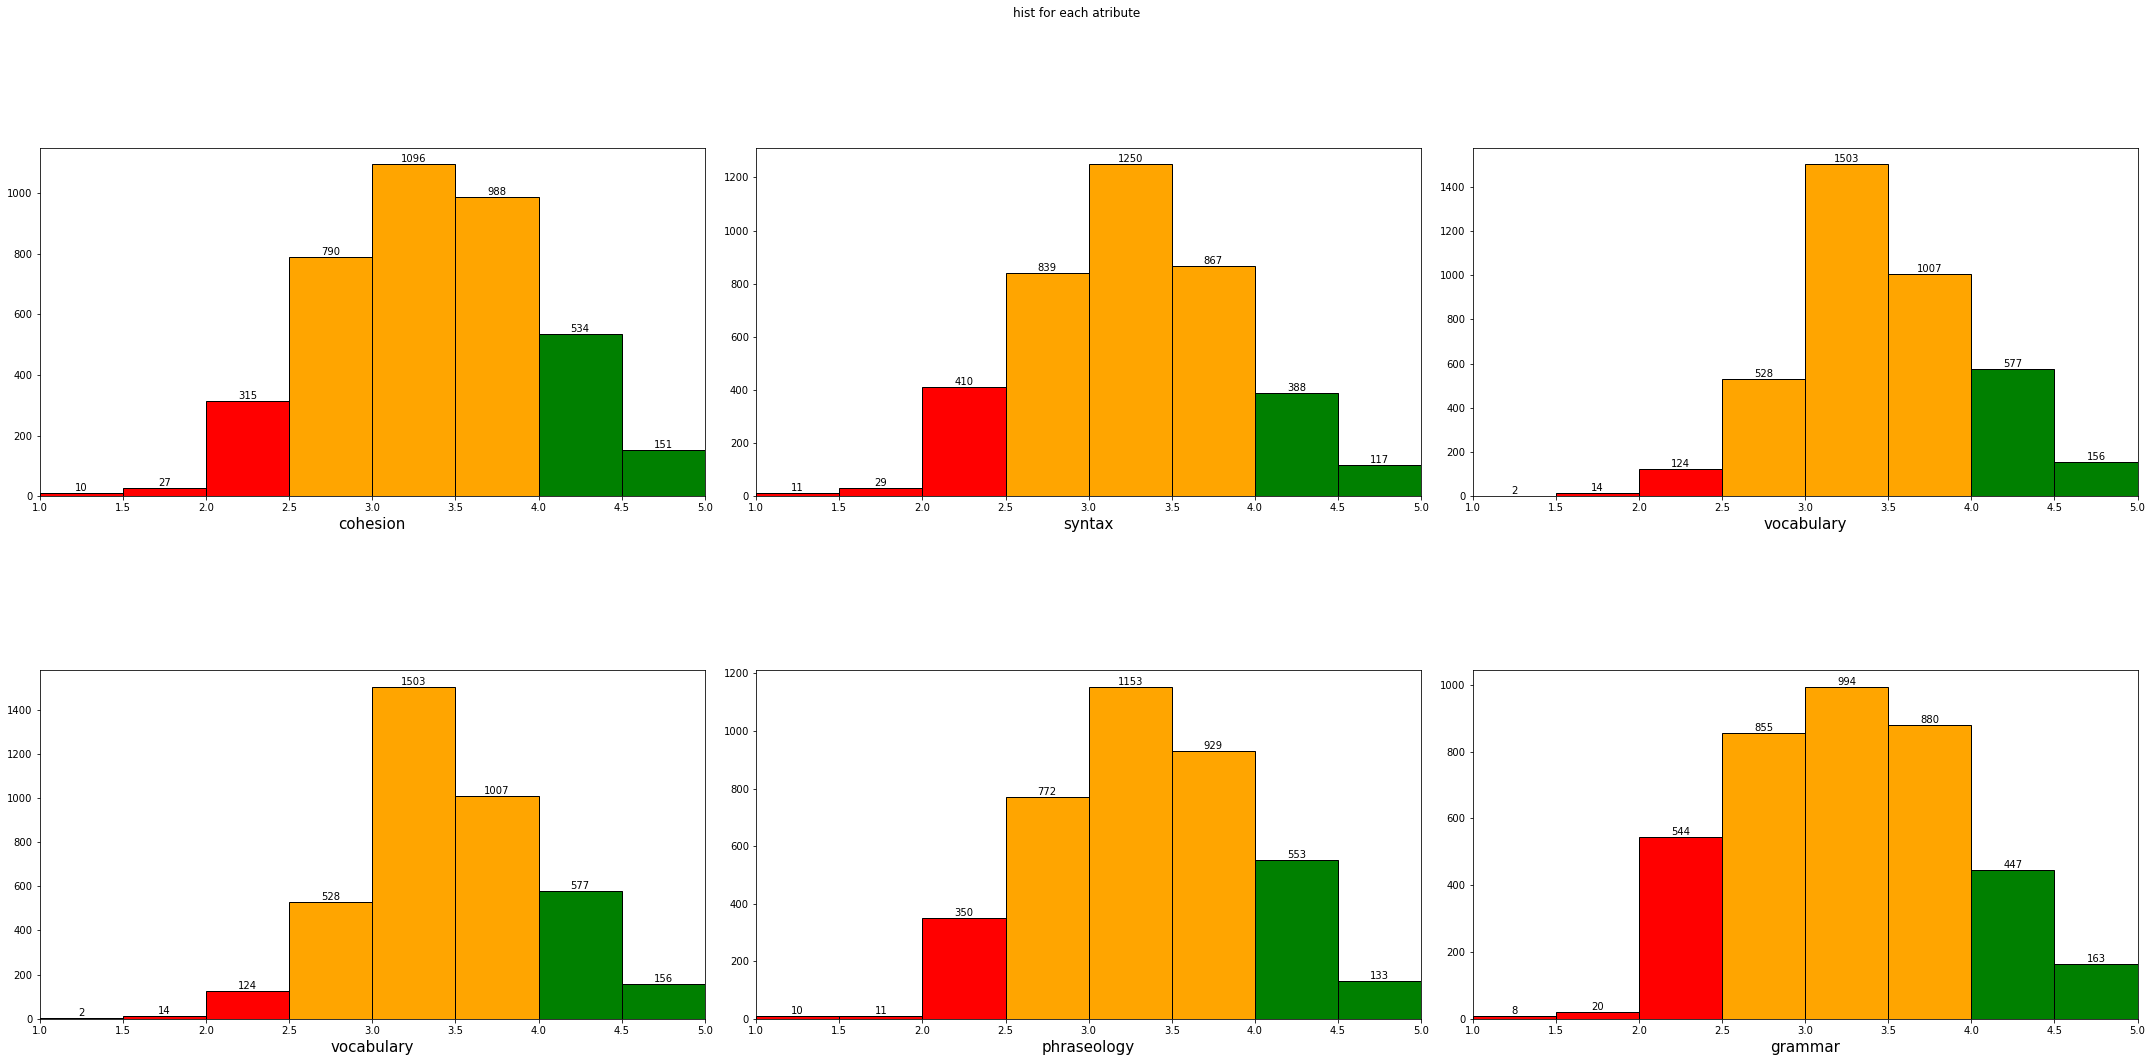

In [90]:

fig,ax =plt.subplots(2,3) 
fig.suptitle("hist for each atribute")   
fig.set_figwidth(30)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1]    
target_names=list(y)
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j
        N, bins, patches=ax[i,j].hist(y[target_names[oneDIndex]],edgecolor="black",bins=8)   
        for k in range(0,3):
            patches[k].set_facecolor("red") 
        for k in range(3,6): 
            patches[k].set_facecolor("orange")
        for k in range(6,len(patches)):  
            patches[k].set_facecolor("green")
        ax[i,j].bar_label(patches)
        ax[i,j].set_xlabel(target_names[oneDIndex],size=15)  
        ax[i,j].set_xbound(lower=1.0,upper=5.0)
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
aux=list(y["syntax"]) 
aux.count(2.6)